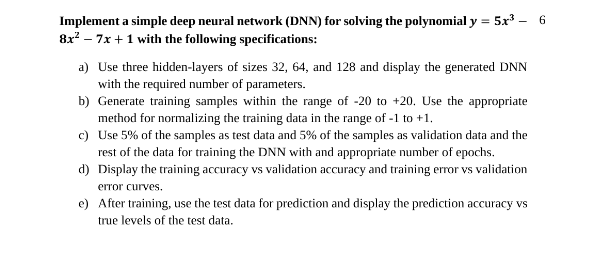

# Import necessary modules

In [174]:
from keras.layers import Input,Dense
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# Function Y =  5x^3 - 68x^2 - 7x + 1

In [175]:
def y_value_generator(X):
    return 5*X**3 - 68*X**2 - 7*X + 1

# Prepare Dataset X and Y

In [176]:
#n = number of data points(X values)
n = 5000
X = np.random.randint(-20,21,n)
Y = y_value_generator(X)


# Separate Data for Traing, validation and testing purpose from Dataset

In [177]:
# normalize [-1,1]
X =  X/max(X)
Y = Y/max(Y)
length = len(X)
# training data 90%
end_pos = int(length*0.9)
x_train, y_train = X[:end_pos], Y[:end_pos]
# validation data 5%
start_pos, end_pos =int(length*0.9),int(length*0.95)
x_val, y_val = X[start_pos:end_pos], Y[start_pos:end_pos]
# testing data 5%
start_pos = int(length*0.95)
x_test, y_test = X[start_pos:],Y[start_pos:]


# DNN Model Architecture

In [178]:
input_shape = (1,)
inputs = Input(input_shape)

x = Dense(32,activation='relu')(inputs)
x = Dense(64,activation='relu')(x)
x = Dense(128,activation='relu')(x)

outputs = Dense(1,activation='relu',name = 'output_layer')(x)

model = Model(inputs = inputs,outputs = outputs,name = 'FC_DNN_Model')
model.summary()

Model: "FC_DNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_48 (Dense)            (None, 32)                64        
                                                                 
 dense_49 (Dense)            (None, 64)                2112      
                                                                 
 dense_50 (Dense)            (None, 128)               8320      
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile & Train The Model

In [179]:
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.R2Score(name='accuracy')]
)


fitted_model=model.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val))


Epoch 1/10
141/141 [==============================] - 2s 4ms/step - loss: 0.5100 - accuracy: 0.7477 - val_loss: 0.0342 - val_accuracy: 0.9796
Epoch 2/10
141/141 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9937 - val_loss: 0.0035 - val_accuracy: 0.9979
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.9989 - val_loss: 0.0015 - val_accuracy: 0.9991
Epoch 4/10
141/141 [==============================] - 0s 2ms/step - loss: 7.9462e-04 - accuracy: 0.9996 - val_loss: 4.0197e-04 - val_accuracy: 0.9998
Epoch 5/10
141/141 [==============================] - 0s 2ms/step - loss: 4.5432e-04 - accuracy: 0.9998 - val_loss: 3.2315e-04 - val_accuracy: 0.9998
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 2.3511e-04 - accuracy: 0.9999 - val_loss: 1.7367e-04 - val_accuracy: 0.9999
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 1.7952e-04 - accuracy: 0.9999 - val_loss: 1.8056e-

# Plotting The Curves

plotting loss value

Text(0.5, 0, 'epochs')

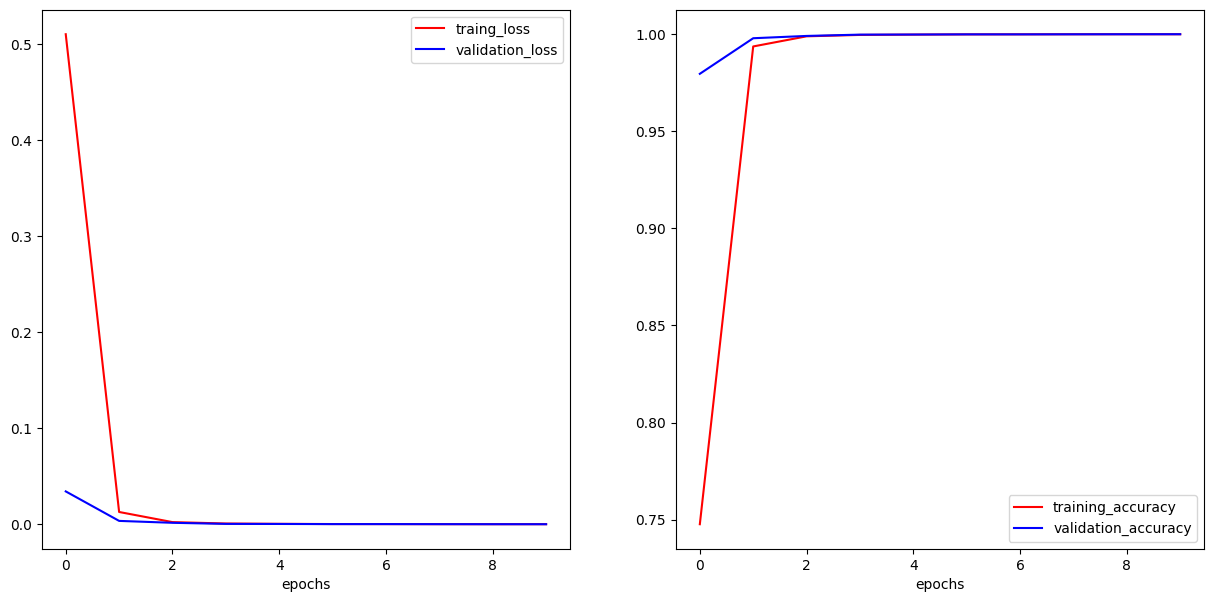

In [180]:
history = fitted_model.history

#plot loss
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(history['loss'],'r')
plt.plot(history['val_loss'],'b')
plt.legend(['traing_loss','validation_loss'])
plt.xlabel('epochs')


plt.subplot(1,2,2)
plt.plot(history['accuracy'],'r')
plt.plot(history['val_accuracy'],'b')
plt.legend(['training_accuracy','validation_accuracy'])
plt.xlabel('epochs')

plotting predicting data

8/8 [==============================] - 0s 2ms/step


Text(0, 0.5, 'y values')

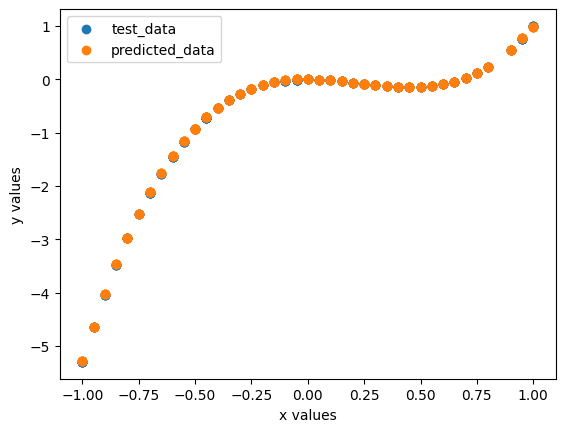

In [181]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,model.predict(x_test))
plt.legend(['test_data','predicted_data'])
plt.xlabel('x values')
plt.ylabel('y values')